In [22]:
from sklearn.metrics import confusion_matrix
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# 1-1. Gini Impurity چیست؟
Gini Impurity معیاری برای سنجش میزان ناخالصی یک مجموعه داده است.
اگر تمام نمونه‌ها متعلق به یک کلاس باشند، مقدار Gini برابر صفر است (مجموعه کاملاً خالص).
در الگوریتم Random Forest از Gini برای انتخاب بهترین تقسیم در هر گره استفاده می‌شود.

# 1-2. Information Gain چیست؟

Gini Impurity معیاری برای سنجش میزان ناخالصی یک مجموعه داده است.
اگر تمام نمونه‌ها متعلق به یک کلاس باشند، مقدار Gini برابر صفر است (مجموعه کاملاً خالص).
در الگوریتم Random Forest از Gini برای انتخاب بهترین تقسیم در هر گره استفاده می‌شود.

# 2.1

In [23]:
data = pd.read_csv("heart_cleveland_upload.csv")

X = data.drop("condition", axis=1)
y = data["condition"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

Training samples: 207
Testing samples: 90


# 3.1

In [24]:
rf = RandomForestClassifier(
    n_estimators=100,
    criterion="gini",
    max_depth=4,
    random_state=42
)

rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


# 3.2

In [25]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 0.9178743961352657
Test Accuracy: 0.7666666666666667


3.3 Feature Importance + Bar Chart

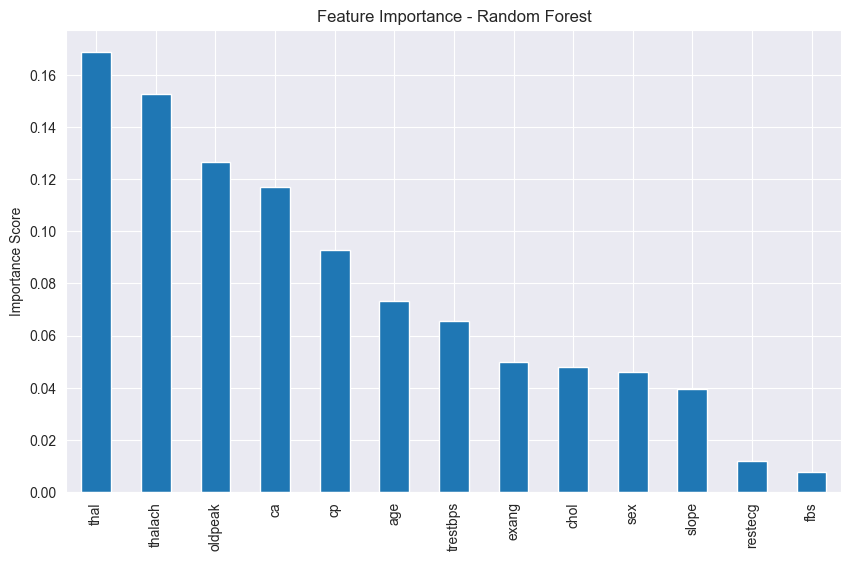

In [26]:
feature_importance = pd.Series(
    rf.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
feature_importance.plot(kind="bar")
plt.title("Feature Importance - Random Forest")
plt.ylabel("Importance Score")
plt.show()

# 3-4. چرا Random Forest کمتر از Decision Tree overfit می‌شود؟
	•	Random Forest از چندین درخت تصمیم استفاده می‌کند
	•	هر درخت روی داده‌ها و ویژگی‌های تصادفی آموزش می‌بیند
	•	میانگین‌گیری نتایج درخت‌ها باعث کاهش واریانس و overfitting می‌شود

In [27]:
cm = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:\n", cm)

TN, FP, FN, TP = cm.ravel()

print("True Positive (TP):", TP)
print("True Negative (TN):", TN)
print("False Positive (FP):", FP)
print("False Negative (FN):", FN)

Confusion Matrix:
 [[37 11]
 [10 32]]
True Positive (TP): 32
True Negative (TN): 37
False Positive (FP): 11
False Negative (FN): 10


# 4-3. FN خطرناک‌تر است یا FP؟

پاسخ (فارسی):
در سیستم تشخیص پزشکی قلب، False Negative (FN) خطرناک‌تر است،
زیرا بیمار واقعی به اشتباه سالم تشخیص داده می‌شود و درمان دریافت نمی‌کند.
در حالی که False Positive (FP) فقط باعث انجام آزمایش‌های اضافی می‌شود.